# Importing Libraries

In [111]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Data Overview

In [112]:
diamonds = pd.read_csv('../diamonds.csv')

In [113]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [114]:
diamonds.shape

(48940, 10)

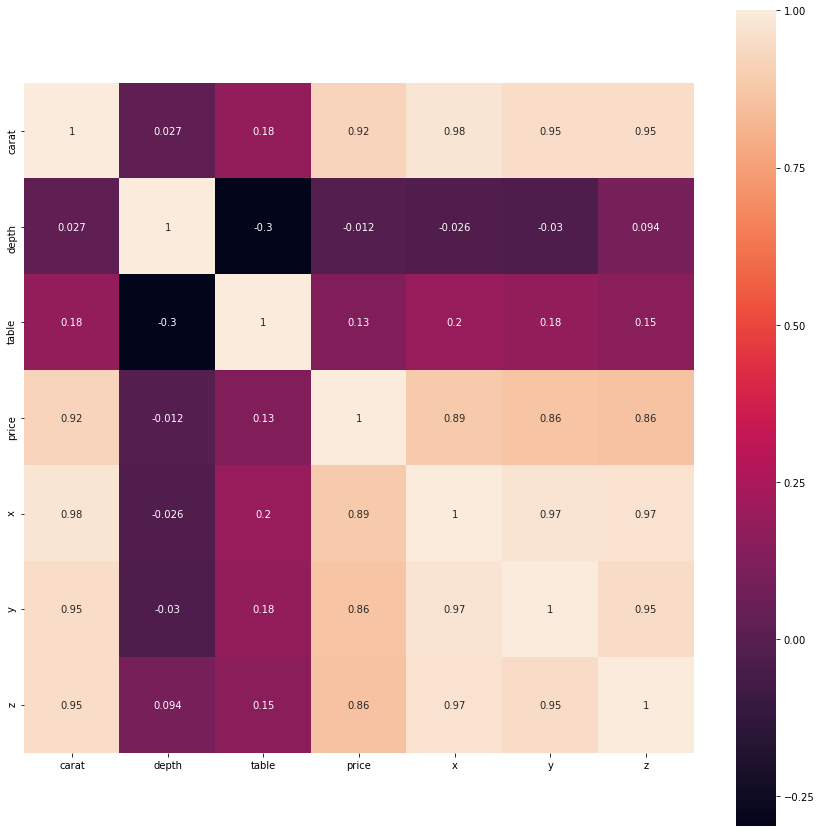

In [115]:
plt.figure(figsize=(15, 15))
sns.heatmap(diamonds.corr(), annot=True, square=True)

# First Deliverable

In [10]:
# Average price for all diamonds

d_mean = diamonds['price'].mean()
d_mean

3934.409644462607

In [9]:
rick_diamonds = pd.read_csv('./rick_diamonds.csv')

In [11]:
# Creating the price_predicted column in rick's dataset

rick_diamonds['price_predicted'] = d_mean
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.409644
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3934.409644
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,3934.409644
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3934.409644
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,3934.409644


In [12]:
diamonds['price_predicted'] = d_mean

In [17]:
r2 = r2_score(diamonds['price'], diamonds['price_predicted'])

print(f'R² = {r2}')

R² = 0.0


In [15]:
rmse = np.sqrt(mean_squared_error(diamonds['price'], diamonds['price_predicted']))

print(f'rmse = {rmse}')

rmse = 3989.293102899151


In [ ]:
rick_diamonds.to_csv('./rick_diamonds_2.csv')

# Linear Regression 1

The first linear regression using sklearn without cleaning the data

In [42]:
model = LinearRegression()

In [43]:
# Dependent variable : price

X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', ]]
y = diamonds['price']

In [44]:
model = LinearRegression()

In [45]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.score(X,y)

0.860332196313374

In [47]:
y_predicted = model.predict(X)

In [48]:
mse = mean_squared_error(y, y_predicted)

In [49]:
rmse = np.sqrt(mse)
print(f'rmse = {rmse}')

rmse = 1490.884837858107


This rmse looks better than the prevoius one

# Some Data Cleaning

In [50]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
carat      48940 non-null float64
cut        48940 non-null object
color      48940 non-null object
clarity    48940 non-null object
depth      48940 non-null float64
table      48940 non-null float64
price      48940 non-null int64
x          48940 non-null float64
y          48940 non-null float64
z          48940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


Transform categorical variables into numerical variables

In [51]:
# Clarity

diamonds['clarity_mod'] = diamonds['clarity'].map({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})

In [52]:
# Color

diamonds['color_mod'] = diamonds['color'].map({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7})

In [53]:
# Cut

diamonds['cut_mod'] = diamonds['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})

In [54]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3


In [55]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,4.055456,4.407254,3.906416
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.645542,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,8.000000,7.000000,5.000000


There are some 0 values in x, y, z and that's physically impossible, because they're related to the dimensions of the diamond.

Let´s take a look at these 0 values

In [57]:
mask = (diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)
diamonds.loc[mask,:]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,2,4,4
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,1,3,4
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,2,4,4
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,2,5,4
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,1,4,2
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,2,5,5
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,4,3,3
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,4,4,5
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,5,4,1
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,2,3,4


Using the formula of the depth --> Total depth percentage = 2 * z / (x + y), it's possible to calculate some z values

In [59]:
def calculate_z(row):
    z = round((row['depth'] * (row['x'] + row['y'])) / 2 /100, 2)
    return z

In [60]:
diamonds['z'] = diamonds.apply(calculate_z, axis=1)

In [61]:
diamonds.loc[diamonds['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0,4,3,3
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0,5,4,1
22240,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0,4,4,5
23795,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0,7,7,4
24864,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0,2,3,4
44936,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0,2,5,2


# Linear Regression 2

Now using all numerical categories, including the ones I modified

In [62]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod']]
y = diamonds['price']

In [63]:
model = LinearRegression()

In [65]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.score(X,y)

0.9091984843330091

In [67]:
y_predicted = model.predict(X)

In [68]:
mse = mean_squared_error(y, y_predicted)

In [70]:
rmse = np.sqrt(mse)
print(f'rmse = {rmse}')

rmse = 1202.1052533222871


The rmse looks even better!

# Applying to rick's diamonds

In [71]:
rick = pd.read_csv('./rick_diamonds.csv')

In [72]:
rick['clarity_mod'] = rick['clarity'].map({'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7})
rick['color_mod'] = rick['color'].map({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7})
rick['cut_mod'] = rick['cut'].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})

In [73]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod']]
y = diamonds['price']

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
data_to_predict = pd.DataFrame(rick, columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod'])
data_to_predict

,carat,depth,table,x,y,z,clarity_mod,color_mod,cut_mod
0,0.91,63.4,57.0,6.10,6.18,3.89,1,3,2
1,0.38,60.3,61.0,4.68,4.71,2.83,3,5,1
2,0.52,61.8,56.0,5.19,5.16,3.20,3,3,4
3,1.10,61.3,56.0,6.65,6.69,4.09,4,4,4
4,2.28,61.6,57.0,8.44,8.37,5.18,1,4,4
...,...,...,...,...,...,...,...,...,...
4995,0.30,62.2,59.0,4.25,4.30,2.66,1,7,2
4996,0.51,61.9,56.0,5.09,5.14,3.16,5,5,4
4997,1.01,60.6,60.0,6.37,6.43,3.88,2,5,2
4998,0.31,62.1,56.0,4.35,4.38,2.71,6,5,4


In [75]:
rick['price_predicted'] = model.predict(data_to_predict)

In [76]:
rick

,carat,cut,color,clarity,depth,table,x,y,z,clarity_mod,color_mod,cut_mod,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,1,3,2,2452.858296
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3,5,1,-492.778260
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3,3,4,442.191954
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,4,4,6312.288744
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,1,4,4,15975.061016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,1,7,2,-1078.608463
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,4,2149.764299
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,2,5,2,4631.272493
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,6,5,4,1129.056016


In [ ]:
rick.to_csv('./rick_diamonds_2.csv')

# Trying to use Log

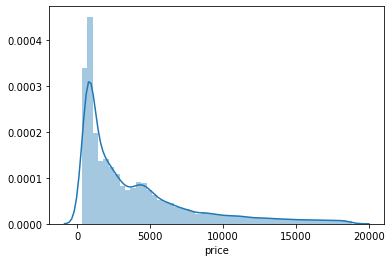

In [79]:
sns.distplot(diamonds['price'])

In [77]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.539508,4.055456,4.407254,3.906416
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.697226,1.645542,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.730000,8.000000,7.000000,5.000000


In [78]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,7,4
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3,7,5
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,7,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3


In [81]:
mask = (diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)

d_log = diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod']].loc[~mask,:]
d_log = np.log(d_log)
d_log

,carat,depth,table,price,x,y,z,clarity_mod,color_mod,cut_mod
0,-1.560648,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248,1.098612,1.791759,1.386294
1,-1.469676,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248,1.609438,1.791759,0.693147
2,-1.237874,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984,1.386294,0.693147,1.386294
3,-1.171183,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601,0.693147,0.000000,0.693147
4,-1.427116,4.139955,4.043051,5.817111,1.371181,1.376244,0.908259,1.791759,0.000000,1.098612
...,...,...,...,...,...,...,...,...,...,...
48935,-0.328504,4.138361,4.077537,7.921898,1.738710,1.745716,1.275363,1.098612,1.945910,1.386294
48936,-0.328504,4.107590,4.043051,7.921898,1.749200,1.750937,1.252763,1.098612,1.945910,1.609438
48937,-0.328504,4.144721,4.007333,7.921898,1.738710,1.749200,1.283708,1.098612,1.945910,0.693147
48938,-0.356675,4.139955,4.094345,7.921898,1.733424,1.736951,1.269761,1.098612,1.945910,1.098612


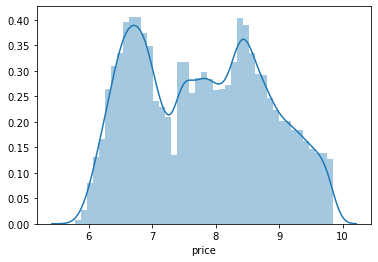

In [82]:
sns.distplot(d_log['price'])

## Linear Regression

In [116]:
X = d_log[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod']]
y = d_log['price']

In [117]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
model.score(X,y)

0.9822734701449464

In [119]:
y_predicted = model.predict(X)

In [122]:
mse = mean_squared_error(np.exp(y), np.exp(y_predicted))

In [123]:
rmse = np.sqrt(mse)
rmse

824.0369020165326

## Predict Rick's diamonds

In [93]:
rick = pd.read_csv('./rick_diamonds.csv')
rick2 = rick.copy()

In [94]:
rick['clarity_mod'] = rick['clarity'].map({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})
rick['color_mod'] = rick['color'].map({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7})
rick['cut_mod'] = rick['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})

In [95]:
rick['x'] = rick['x'].apply(lambda x: 0.1 if x == 0 else x)
rick['y'] = rick['y'].apply(lambda x: 0.1 if x == 0 else x)
rick['z'] = rick['z'].apply(lambda x: 0.1 if x == 0 else x)

In [96]:
rick

,carat,cut,color,clarity,depth,table,x,y,z,clarity_mod,color_mod,cut_mod
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,3,3
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,5,2
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4,3,5
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,2,7,3
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,6,5,5
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,7,5,5


In [97]:
rick = np.log(rick[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod']])

In [98]:
rick

,carat,depth,table,x,y,z,clarity_mod,color_mod,cut_mod
0,-0.094311,4.149464,4.043051,1.808289,1.821318,1.358409,0.693147,1.098612,1.098612
1,-0.967584,4.099332,4.110874,1.543298,1.549688,1.040277,1.386294,1.609438,0.693147
2,-0.653926,4.123903,4.025352,1.646734,1.640937,1.163151,1.386294,1.098612,1.609438
3,0.095310,4.115780,4.025352,1.894617,1.900614,1.408545,1.609438,1.386294,1.609438
4,0.824175,4.120662,4.043051,2.132982,2.124654,1.644805,0.693147,1.386294,1.609438
...,...,...,...,...,...,...,...,...,...
4995,-1.203973,4.130355,4.077537,1.446919,1.458615,0.978326,0.693147,1.945910,1.098612
4996,-0.673345,4.125520,4.025352,1.627278,1.637053,1.150572,1.791759,1.609438,1.609438
4997,0.009950,4.104295,4.094345,1.851599,1.860975,1.355835,1.098612,1.609438,1.098612
4998,-1.171183,4.128746,4.025352,1.470176,1.477049,0.996949,1.945910,1.609438,1.609438


In [99]:
X = rick[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_mod', 'color_mod', 'cut_mod']]

In [100]:
y_pred = model.predict(X)

In [101]:
y_pred = np.exp(y_pred)

In [105]:
rick2['price_predicted'] = y_pred

In [106]:
rick2.to_csv('./rick_diamonds_2.csv')

In [107]:
rick2

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2807.584638
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,853.065528
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1469.872944
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7198.553326
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,18291.284228
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,440.350629
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,1934.195819
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,4736.379106
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,830.226803


In [108]:
rick2.to_csv('./rick_diamonds_2.csv')

In [109]:
# Real rmse = 948.55